### <b><p align="center"> What's Cooking?</p></b>


# load data libraries

In [1]:
import numpy as np # linear algebra library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import zipfile # to read zip files
from sklearn.model_selection import train_test_split

##show speciefic raws

In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.precision',150)
pd.options.display.float_format = '{:,.3f}'.format

##reading data

In [4]:
#unzip the files
archive_train = zipfile.ZipFile('/content/train.json.zip')

#read training json file 
train = pd.read_json(archive_train.read('train.json'))

#output the frist 5 rows
train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


##splitting data

In [6]:
train_data, test_data = train_test_split(train, test_size=0.4, random_state=1)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=1)

train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [7]:
print("Train set size is ",len(train_data))
print("Val set size is ",len(val_data))
print("Test set size is ",len(test_data))

Train set size is  23864
Val set size is  7955
Test set size is  7955


##understanding data

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23864 entries, 0 to 23863
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           23864 non-null  int64 
 1   cuisine      23864 non-null  object
 2   ingredients  23864 non-null  object
dtypes: int64(1), object(2)
memory usage: 559.4+ KB


#conclusion from understanding :
> The main takeaways are: 
> - There is 23864 records.
> - There is no nulls in all columns.
> - only the id in an integer column.

## 2.2 How many cuisines are there?


In [9]:
# number of unique cuisines
num_cuisines = len(train_data['cuisine'].unique())
print("there are ",num_cuisines," unique cuisines.")

there are  20  unique cuisines.



## 2.3 What is the frequency of each cuisine?


In [10]:
# let's save list of cuisine names we have
labels = train_data['cuisine'].unique()

## ploting graph

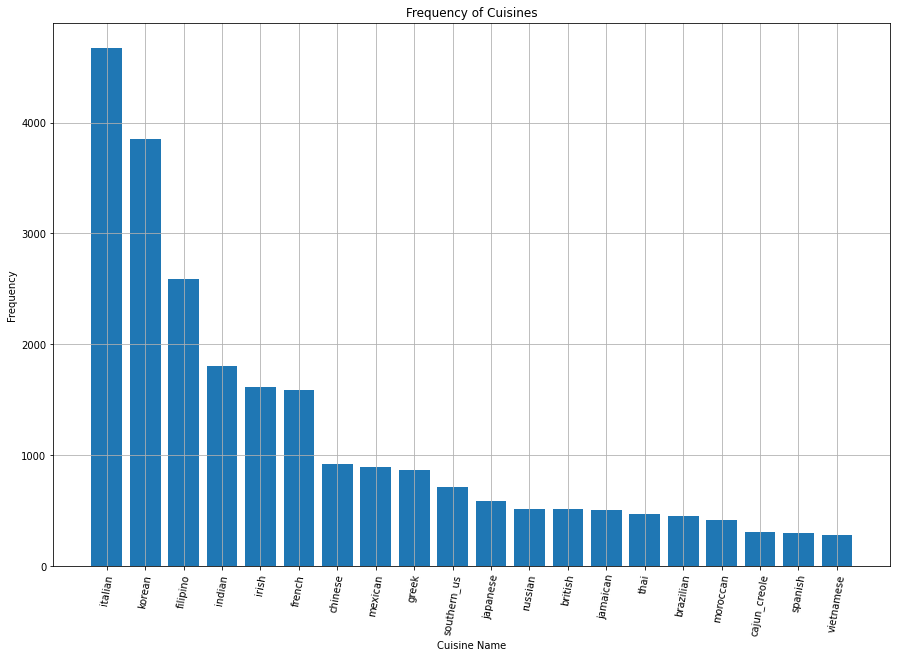

In [12]:
# plot the graph
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10)) # create the plot and specify the figure size
plt.xlabel('Cuisine Name') # specify the x labels
plt.ylabel('Frequency') # specify the y labels
plt.title('Frequency of Cuisines') # specify the plot title
plt.bar(labels,train_data['cuisine'].value_counts()) # create a bar plot
plt.xticks(rotation=80) # rotate the x labels
plt.grid() # show the grid
plt.show() # show the final plot

> knoweldge from diagram :
 >- most common kitchen is italian kitchen
 >- least common kitchen is vietnamese
 >- data not balanced (not distributed equally)

## 2.4 How many ingredients per recipes we have?

In [13]:
# add column with num of ingredienrs per recipe
train_data['ingredients_num'] = train_data["ingredients"].apply(len)

# save list of the unique numbers we have
numbers = train_data["ingredients"].apply(len).unique()

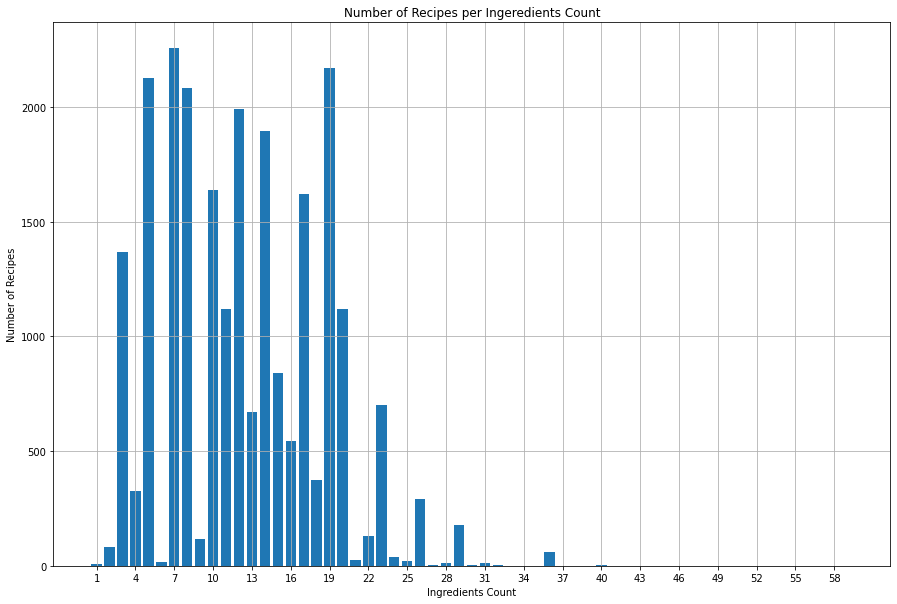

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(numbers,train_data["ingredients_num"].value_counts().sort_index())
plt.xlabel('Ingredients Count')
plt.ylabel('Number of Recipes')
plt.title('Number of Recipes per Ingeredients Count')
plt.xticks(np.arange(min(numbers), max(numbers)+1, 3.0)) # change x labels from the defult to the given range
plt.grid()
plt.show()

> conclusion:
>- this diagram is not enough for retrieving knoweldge 
of most ingredients count using in large numbers of recipies


##Let's try to view the graph in another way.

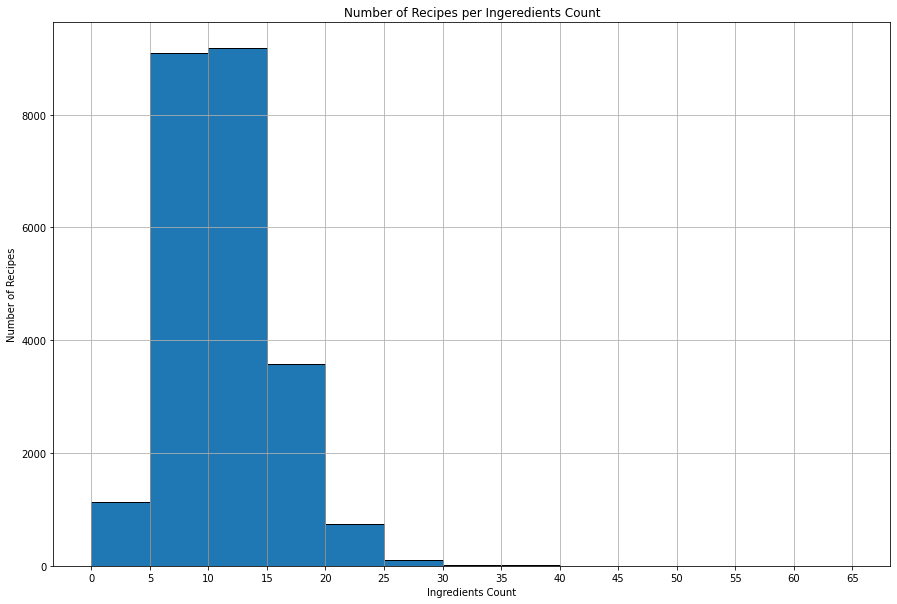

In [17]:
bins = range(0,70,5)

fig, ax = plt.subplots(figsize=(15,10))
plt.hist(train_data['ingredients_num'], bins=bins, edgecolor="k") # output a histogram plot
plt.xlabel('Ingredients Count')
plt.ylabel('Number of Recipes')
plt.title('Number of Recipes per Ingeredients Count')
plt.xticks(bins) # change x labels from the defult to the given range
plt.grid()
plt.show()

# Now this have a more obvious information. 

> The main takeaways are:
> - most recipies between 5 & 15 ingredients

##Now, let's build up on this information.



In [21]:
print("There are " ,len(train_data[train_data["ingredients_num"]<2]), " recipes with ingredients less than 5.")
print("There are " ,len(train_data[train_data["ingredients_num"]>30]), " recipes with ingredients more than 30.")

There are  15  recipes with ingredients less than 5.
There are  22  recipes with ingredients more than 30.


In [22]:
train_data[train_data["ingredients_num"]<2][['ingredients']]

,ingredients
1088,[sticky rice]
1972,[sushi rice]
2025,[lemonade concentrate]
6255,[spanish chorizo]
10335,[butter]
10952,[water]
11028,[unsalted butter]
11809,[jasmine rice]
13431,[butter]
14606,[corn tortillas]


>- I'll assume that these are not recipes.

## we show anouther side of outliers

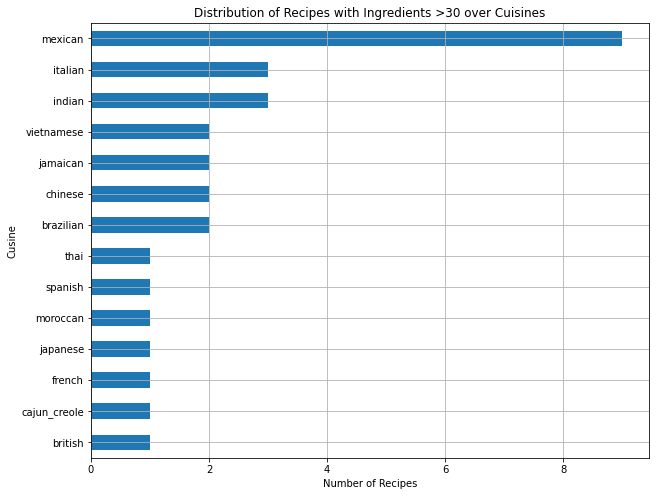

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
train_data[train_data["ingredients_num"]>=30].groupby(['cuisine']).size().sort_values().plot(kind='barh', ax=ax)
plt.title('Distribution of Recipes with Ingredients >30 over Cuisines')
plt.ylabel('Cusine')
plt.xlabel('Number of Recipes')
plt.grid()
plt.show()

>- So almost half of the reciepies with large number of ingreadients are mexican.


## 2.5 What is the frequancy of the ingredients?

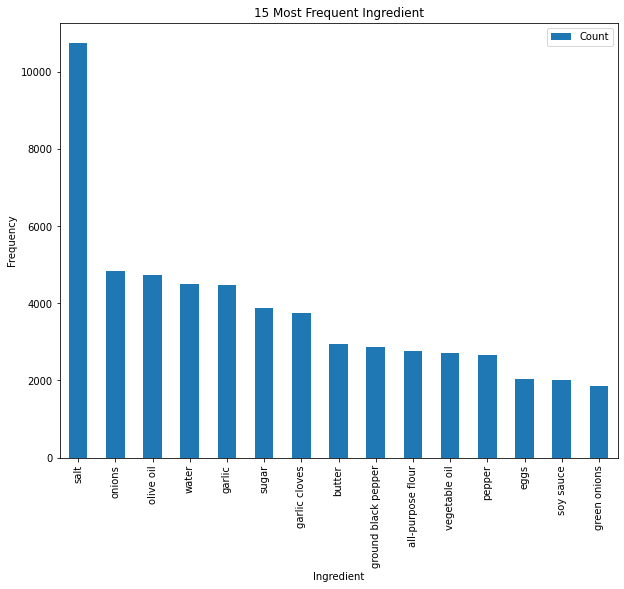

In [25]:
# now let's split all recipes ti have list of ingredients
ingredients = pd.Series((','.join([','.join(row["ingredients"]) for ind,row in train_data.iterrows()])).split(','))
from collections import Counter

fig, ax = plt.subplots(figsize=(10,8))
lst = Counter(ingredients).most_common(15)
df = pd.DataFrame(lst, columns = ['Ingredient', 'Count'])
df.plot.bar(x='Ingredient',y='Count', ax=ax)
plt.title('15 Most Frequent Ingredient')
plt.ylabel('Frequency')
plt.xlabel('Ingredient')
plt.show()

>- the ingredient that have most frequences is salt